In [1]:
# See last trial for latest results and optimization notes.
# Need 93% accuracy

# Setting up Fashion_MNST
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical
import time

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

(training_images2, training_labels2), (test_images2, test_labels2) = fashion_mnist.load_data()
training_data2 = training_images2.reshape(training_images2.shape[0], image_size) 
test_data2 = test_images2.reshape(test_images2.shape[0], image_size)

training_labels2 = to_categorical(training_labels2, num_classes)
test_labels2 = to_categorical(test_labels2, num_classes)

Using TensorFlow backend.


In [2]:
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)
conv_training_data2 = training_images2.reshape(60000, 28, 28, 1)
conv_test_data2 = test_images2.reshape(10000, 28, 28, 1)

TypeError: Invalid shape (28, 28, 1) for image data

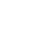

In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
)

datagen.fit(conv_training_data2)

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(conv_training_data[(i+50)], cmap='Greys')

In [ ]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
# Best CNN model reached 0.905 w/ 30 sec run time.
# used best model w/ 3rd CNN filter, didnt work.
# Tried more epochs didnt work.
# stride instead of maxpool didnt work.
###test all optimizers and loss next.
#####then, optimize ANN head.
#######finally, data augmentation

#Trying optimizer optimization (need to copy old code)
####Get naming framework from n_n_v6_req (runcodecalls variables)

def CNN_BaseModel_Optimizer():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(126, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    #note that the class 'model' changes with each cell.
    return model

In [ ]:
#note - verify loss function categorical cross entropy vs others.

model = CNN_BaseModel_Optimizer()
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=6, verbose=False, validation_split=.1)
# plot_training_history(history, model, eval_images=True)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
###find the shape of the array, then proceed with image augmentation:
# >>> x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
# >>> type(x)
# <type 'numpy.ndarray'>
# >>> x.shape
# (2, 3)
# >>> x.dtype
# dtype('int32')